# <span style="color:#FF8787">__Day 6. 머신러닝(1)__</span>

><span style="color:#3085C3">__1) 워크플로우__</span><br>

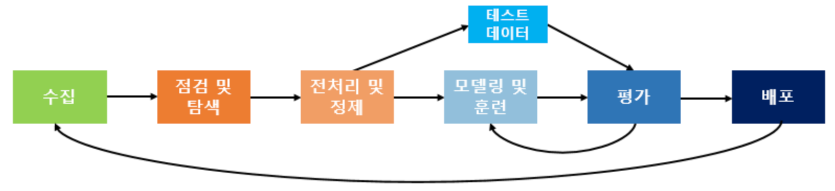

- 수집 : input데이터와 output데이터를 수집.
- 점검 및 탐색 : 수집된 데이터 파악  / 탐색적 데이터 분석
- 전처리 및 정제
    * 전처리 : 추가변수(추가데이터를 제공)를 만들어줄 수 있다.
    * 정제 : 꼭 필요한 정보만 거르기
- 모델링 및 훈련 
    * 모델링 : 학습초기데이터 셋팅 
    * 훈련 : 모델링을 통해 데이터 학습
- 평가 : 테스트 데이터를 통해 모델 학습 평가 진행 / 평가가 안좋으면 다시 훈련
- 배포 : 일반 사용자들이 사용할 수 있게 서비스에 배포

><span style="color:#3085C3">__2) 알고리즘 분류__</span><br>

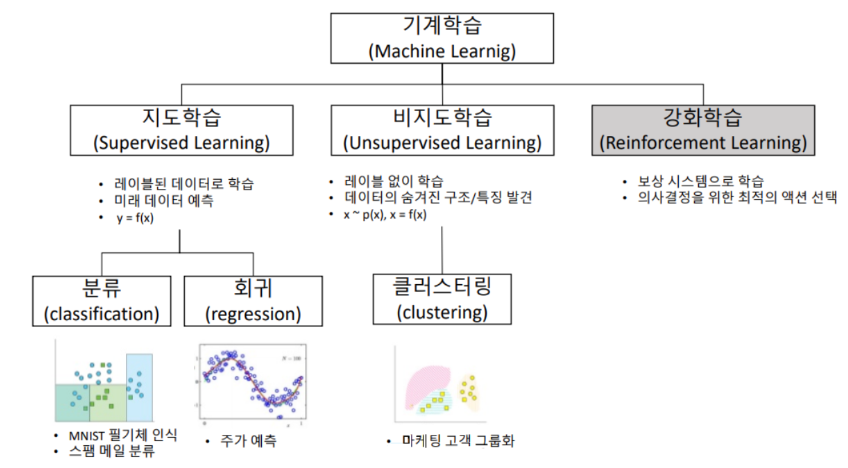

- 지도학습 : input(학습을 위한 데이터/입력값)와 output(정답/출력값)을 이용해서 왜 틀렸는지부터 상세하게 정보제공 및 올바르게 학습하는지 확인
    * 분류 : 어떤사진을 줬을 때 강아지인지 고양이인지 분류하는것
    * 회귀 : 예측모델

- 비지도 학습 : input데이터만 있는 것 (정답 제공 x)
        - 군집 : 분류랑 비슷
        - 차원축소 
        - 연관규칙

- 강화학습 : 틀렸는지 맞았는지만 알려주는 것 (상세 정답 정보는 제공 x)
    
<머신러닝 기본용어><br>
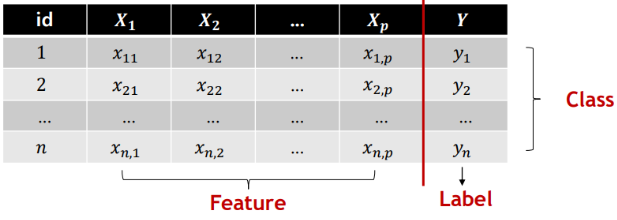

* feature데이터 : input 데이터 (독립변수)
* labe 또는 target 데이터 : output데이터(결과 데이터) (종속변수)
* class : 분류모델할 때 쓴다. 

#### <span style="color:#3085C3">__3) Sckikit - learn__</span>

>사이킷런 모듈
* 분류 classifier / 회귀 regressor 라고 적혀있는걸로 구분

>3-1. 변수 선언
```python
import easydict
args = easydict.EasyDict()
```
args.SEED = 10 (seed 랜덤이 안되고 고정해주는것 / 랜덤이라는 함수에 seed값을 넣어주면 매번 실행하는 값이 똑같은 값이 나온다)<br>
args.target_col = 'target' (target_col을 target_col으로 변수정의 / col = 컬럼의 약자)

***
>3-2. 함수를 실행하기위한 단계
```python
from sklearn.datasets import load_breast_cancer
```
데이터 로드
```python
breast_cancer = load_breast_cancer()
> dir(breast_cancer) #dir 딕셔너리 형태로 결과값 도출
```
***
>3-3. 학습용/검증용 데이터 분리
학습용과 검증용 데이터를 분리해놓는다. (모델이 학습이 잘 되었는지 확인)<br>
학습용 데이터 비율이 높음.

```python
import numpy as np #numpy 불러오기
import pandas as pd #pandas 불러오기
from sklearn.model_selection import train_test_split
```
```py
train, test = train_test_split(df_cancer,  random_state=args.SEED) #train_test_split : 주어진 데이터를 따로 분리시켜주는 함수

train.shape, test.shape #데이터를 학습용/검증용 데이터로 분리해놓은 것
> ((426, 31), (143, 31)) # (row숫자 (데이터의 양)/col (feature의 수)) / 데이터를 나누는것뿐 컬럼은 똑같다
```

* feature와 target이 같이 있는 데이터 
```py
df_cancer = pd.DataFrame(breast_cancer.data, columns= breast_cancer.feature_names) #dataframe = excel 표
df_cancer[args.target_col] = breast_cancer[args.target_col] #target 추가

print(df_cancer.shape)
> (569, 31) #전체데이터
```
***
> 3-4. 데이터 점검 및 탐색
- train.head() : 위에 있는 데이터 조회<br>
- train.tail() : 맨 마지막 데이터 조회<br>
- train.infol() : 엑셀데이터에 대해서 자세하게 알아보는 (컬럼마다 데이터 형태, 전체 데이터 양을 확인)<br>
- train.describe() : 통계 (평균,표준편차)를 표현 
***
>3-5. 전처리 및 정제 (feature와 target 같이 있는 전체데이터를 따로 분리)
필요없는 데이터 없애기 (col, row 삭제할지)<br>

train은 전체 데이터 위쪽 / test은 전체 데이터의 아래쪽으로 데이터 분리
```py
x_train, x_test = train.drop(args.target_col, axis=1), test.drop(args.target_col, axis=1) #axis 축 :1은 low축 ,0은 컬럼축 / feature train, feature test
y_train, y_test = train[args.target_col], test[args.target_col] #target train , target test

x_train.shape, y_train.shape
>((426, 30), (426,)) #(col값은 y값이 하나 빠져서 -1이 됨 / low값은 그대로 유지)
```
standardization
: 전처리 작업 스케일링 / 컬럼에 맞게 데이터 사이즈 조절 ex.몸무게 - 10000 , 연봉 = 10000 같은 10000이여도 다르다
```py
scaler = StandardScaler()

train_scaled = scaler.fit_transform(x_train)
test_scaled = scaler.transform(x_test)
```
***
>3-6. 모델링 및 훈련
모델링
```py
from sklearn.linear_model import LogisticRegression #regression 회귀모델로 이용해서 훈련
```
logistic regression / 회귀 모델이지만 이중분류(위 아래 분류) 가능하다.
```py
lr_clf = LogisticRegression() #인스턴스 모델 = class 모델
```

훈련
```py
lr_clf.fit(x_train, y_train) #fit라는 학습 함수를 통해서 학습 / 학습할 때 데이터를 넣어줘야해서 train용(학습용fea, 학습용target)으로 넣기
```
***
>3-7. 평가

from sklearn.metrics import accuracy_score<br>
예측
```py
pred = lr_clf.predict(x_test) 
```
정확도 측정
```py
accuracy_score(y_test, pred) #다른함수에 모델이 예측한 데이터와 target값을 넣어서 비교
```

# 4) numpy
어레이(데이터)차원 : 2차원(머신러닝)<br>
shape : 어레이의 크기를 나타내는 정수 튜플 (row , col)<br>
dtype : 데이터 타입
***
>4-1. 숫자에 따라 구분
* 데이터 하나 : scalar / scalar = 1
* 백터 : 1차원 데이터 (scalar가 여러개 모여 있음) / 리스트 <br>
        ```py
        lst = [1,4,5,6]
        vector = np.array(lst)
        ```
* matrix - 엑셀
* tensor - 3차원

* 데이터의 수 = 숫자들
* 차원  = 모양

* ndim : 차원(dim)의 수(n)
* shape : 데이터의 양 / 각 차원의 수 / 데이터 수(컬럼 수) ex. (4,3) = 12 를 알 수 있다.
***
>4-2. 인덱싱<br>

변수 = x /  x[row][col] 2차원일때는 위치정보2개 / 3차원은 위치정보 3개<br>
matrix
***
>4-3. 슬라이싱
* arr[row,:] / : => 0번째 있는 전체 col을 가져오라는 것
        데이터 수정 arr[0,:] = [11, 12, 13] 
* arr[:,::-1] : row는 전체 , ::-1  => 전체를 거꾸로
* arr[::2, :] : 전체 데이터에서 2칸을 띄우고 보여줘라는 것

```py
arrv = np.vstack((arr1, arr2)) #vstack = vertical stack 수직으로 쌓다. low가 증가
arrv

arrh = np.hstack((arr1, arr2)) #hstack = horizontal stack 수평으로 쌓다. col증가
arrh

arr.resize((5,4)) # 5x4행렬 / 때의 따라 데이터를 바꿀 수 있다. reszie / reshape 
arr

arr = arr.astype(np.float32) # 데이터 타입 변환  astype 
arr.dtype 
```

# 5) pandas
대량의 데이터를 numpy로 통해 구현
***
>5-1. series
- 1차원
- 백터 =  리스트 = 어레이
pd.Series(data=None, index=None, dtype=None, name=None, copy=False) #data는 꼭 넣어야 함

<생성><br>
```py
data = {'a':1, 'b':2, 'c':3} # 딕셔너리<br>
pd.Series(data=data, dtype=np.int16, name='dict') #name에 dict으로 입력해줘야함.
a    1
b    2
c    3
# a,b,c가 인덱스값(식별값) / 1,2,3 data

pd.Series(5.0, index=['a', 'b', 'c', 'd', 'e']) #(데이터, 인덱스값)
```
- 가우시안 분포 
    - 0에 가까워지는 숫자는 조금 높은 숫자로 뽑히고, 높은 숫자는 조금 낮은 숫자로 뽑힌다.
    - randn=random number
    s = pd.Series(data=np.random.randn(5), index=['a', 'b', 'c', 'd', 'e']) #randn(5) = 숫자 5개만 뽑는다.
***
>5-2. 슬라이싱/인덱싱

s[s>s,median()], s.median() #s.median 중의값<br>
s[s>0] # 데이터가 0보다 큰것들만 슬라이싱<br>
s[s<0]

if 조건 1 and 조건2:<br>
elif 조건 3 or 조건4:<br>

    'a' in s : in 뒤에는 list / s는 인덱스값이 있는지 없는지 확인하는 것
    s['a'] : value값 나옴
    s.get('a') : 값이 있으면 해당value값으로 return
    s.get('rr') : 값이 없지만 error발생하지 않게 none값으로 나오게 하고 싶을 때 get이라는 함수 사용
    s.get('rrrr', '코딩좋아^^') : 값이 없으면 다른값으로 return (결과값은 코딩좋아^^ 로 나온다. why? 값이 없기 때문에)
    s.get('a', 'None') : 값이 있다면 해당값 return

<인덱싱도 여러개 뽑을 수 있다. => list로 넣으면 된다.><br>
s[[0,1,2]] #인덱스값을 여러개 불러올 수 있다.

<순서도 바꿔서 요청 및 인덱스값 수정 가능>
s[[0,1,2]] = [0,1,2]

s + s => 같은 인덱스끼리 더해진다
***
>5-3. numpy로 변환

type(s) => s.to_numpy()
***
>5-4. Dataframe 생성

- 2차원 구조<br>
- matrix (엑셀같은)<br>
- df (dataframe 약자)<br>
- index, columns 포함되어 있다<br>
- 시리즈 ,딕셔너리로 dataframe 만들 수 있고, index를 정의가능<br>
- 시리즈가 여러개일 필요없이 1개여도 dataframe을 만들 수 있다.

dataframe을 파이썬 딕셔너리로 변환 df.to_dict()<br>
df.to_json() 많이 사용됨
***
>5-5. 컬럼 선택,추가,삭제

df['one_trunc'] = df['one'][:2] : 인덱싱[col,row] (numpy랑 반대)<br>
=> data값에서 컬럼을 추가하고 해당 컬럼에 다른 컬럼에 속해있는 값을 갖고오고 싶을 때

    컬럼추가 => df['three'] = df['one']+df['two'] => df[컬럼명] = 시리즈 데이터들<br>
    컬럼삭제 => del df[해당컬럼명]<br>
    컬럼수정<br>
    df.columns = ['one', 'bar', 'two', 'three'] # 컬럼수에 맞게 수정 ex.컬럼이 2개면 바꿀 컬럼도 2개로 작성<br>
    df.index = [0,1,2,3] # 수에 맞게 수정 ex.인덱스가 2개면 바꿀 인덱스도 2개로 작성
***
>5-6. 데이터 선택

- seaborn 
```
import seaborn as sns
```
iris = sns.load_dataset("iris")<br>
iris.head() : 데이터 상위 5개를 보여줘라는 명령어 아무것도 안쓸 때는 기본 5개 보여줌 / head(10)면 10개 보여줌<br>
iris.tail() : 데이터 끝에서 5개

cond = iris['petal_length'].isin([1.4,1.3]) : isin => true, false로 보여줌 / in [lsit요소]기준으로 true,false로 나눈다.<br>
위 데이터를 통해서 true false로 필터링할 수 있다. (true인것들만 필터링해서 데이터로 보여줌)<br><br>
cond[:5] <br>
~cond[:5] : ~을 치면 위 값에서 반대로 결과가 바뀐다./ ~ : not

시리즈 형태 : iris['petal_length']<br>
=> dataframe으로 결과값이 보이게 하려면 리스트 형태로 담아주면된다. iris[['petal_length']]
***
>5-7. iloc

인덱싱으로 필터링하고 싶을 때 
i => index의 약자<br>
iris.iloc[4] #여기 i도 index의 약자 / 4번 인덱스값을 가져와달라는 말<br>
iris.iloc[[1,2,-1]] # 1번인덱스,2번인덱스,-1은 마지막 행번호를 나타냄<br>
iris.iloc[:,:3] #슬라이싱 / row, col<br>
iris.iloc[[1,4],[1,2]] # row, col